In [1]:
import pandas as pd
import sklearn.cluster
import sklearn.decomposition

import matplotlib.pyplot as plt
import seaborn as sns

import os.path
import sys

%load_ext autoreload
%autoreload 1

In [2]:
sys.path.append(os.path.abspath(os.path.join(os.path.dirname("src"), "../src")))

%aimport features.normalizer
%aimport features.tools
%aimport data.tools
%aimport data.itsp
%aimport models
%aimport visualization.simple

In [3]:
import data.itsp

import features.normalizer
import features.tools

import visualization.simple

In [4]:
data_frame, columns1 = data.itsp.data_set()
data_frame.head()

,ITSP_CA,ITSP_CB,ITSP_CC,ITSP_CD,ITSP_CE,ITSP_CF,ITSP_CG,ITSP_CH,ITSP_CI,ITSP_CJ,...,ITSP_CP,ITSP_CQ,ITSP_CR,ITSP_CS,ITSP_CT,ITSP_CU,ITSP_CV,ITSP_CW,ITSP_CX,Date
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,T4/2008
1,101.1,100.3,100.7,101.0,100.8,100.6,100.6,100.5,101.1,101.5,...,100.4,100.9,100.4,100.4,100.3,100.6,100.7,100.7,101.1,T1/2009
2,101.9,100.7,101.6,101.3,101.3,101.1,100.8,101.0,101.5,101.9,...,100.5,101.1,100.6,100.7,101.0,101.1,101.1,101.2,101.4,T2/2009
3,102.2,100.7,102.0,101.7,101.6,101.4,101.4,101.4,101.8,102.2,...,101.2,102.0,101.8,101.1,101.8,102.0,101.6,101.6,101.8,T3/2009
4,102.5,101.2,102.3,101.9,102.0,101.6,101.6,101.6,102.1,102.2,...,101.4,102.2,102.2,101.5,102.2,102.3,101.9,101.8,102.2,T4/2009


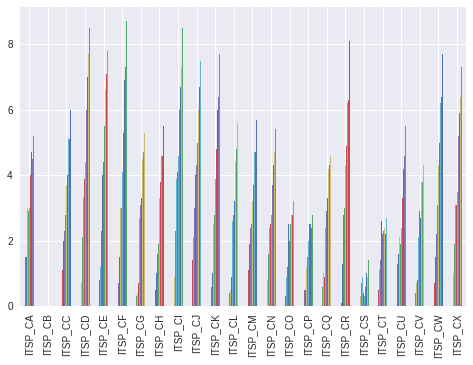

In [5]:
t_data = data_frame.copy().drop("Date", axis=1).transpose()
t_data = t_data - t_data.min()
ax = t_data.plot.bar()
ax.legend().set_visible(False)
plt.show()

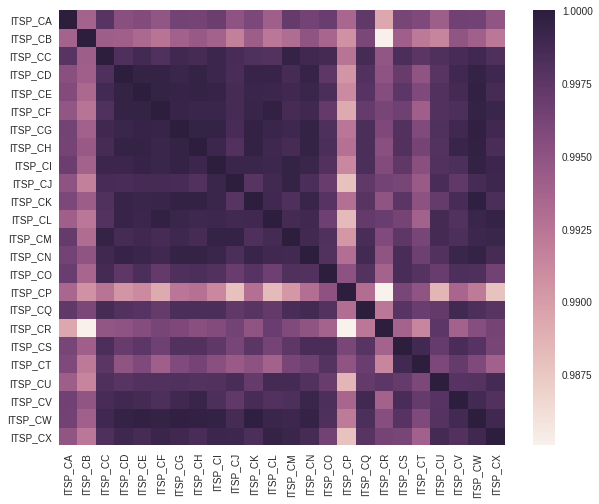

In [6]:
wd_data = data_frame.copy().drop("Date", axis=1)
corr = wd_data.corr()

visualization.simple.heat_map(corr, corr.columns.values, corr.columns.values, (10, 8))

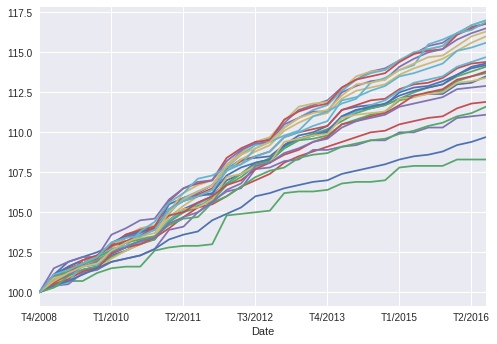

In [7]:
data_all = data_frame
ax = data_frame.plot(x="Date")
ax.legend().set_visible(False)
plt.show()

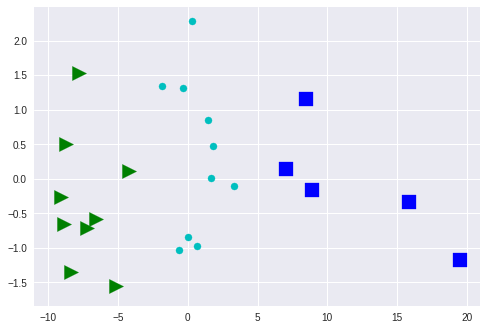

In [8]:
s_data = data_all.copy().drop("Date", axis=1).transpose()

reduced_data = sklearn.decomposition.PCA(n_components=2).fit_transform(s_data)
kmeans = sklearn.cluster.KMeans(n_clusters=3, random_state=0).fit(reduced_data)

visualization.simple.k_means(reduced_data, kmeans.labels_)

In [9]:
norm_data = data_frame.copy().drop("Date", axis=1)
norm_data = features.normalizer.simple_min_max(norm_data)
norm_data = pd.concat([norm_data, data_frame[["Date"]]], axis=1)

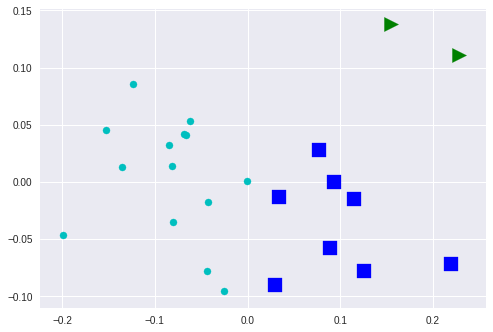

In [10]:
s_data = norm_data.copy().drop("Date", axis=1).transpose()

reduced_data = sklearn.decomposition.PCA(n_components=2).fit_transform(s_data)
kmeans = sklearn.cluster.KMeans(n_clusters=3, random_state=0).fit(reduced_data)

visualization.simple.k_means(reduced_data, kmeans.labels_)

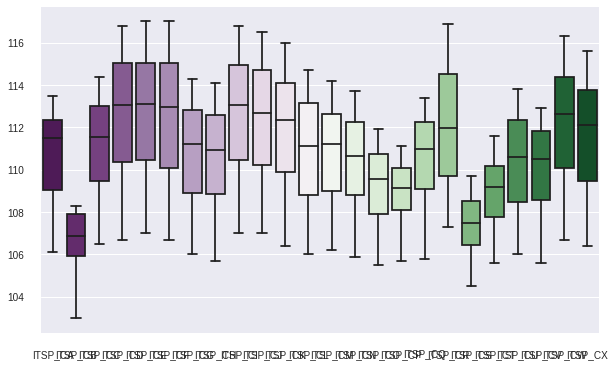

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_frame.tail(20), palette="PRGn")
sns.despine(offset=10, trim=True)
plt.show()